In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Chapter 2: End-to-end project - California Housing Price
#### Created on 2021-02-27

### 0. Downland the housing dataset

In [2]:
import os
import tarfile
from six.moves import urllib

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [4]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
import pandas as pd

In [7]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
housing = load_housing_data()

In [10]:
print(len(housing))
housing.head(1)

20640


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


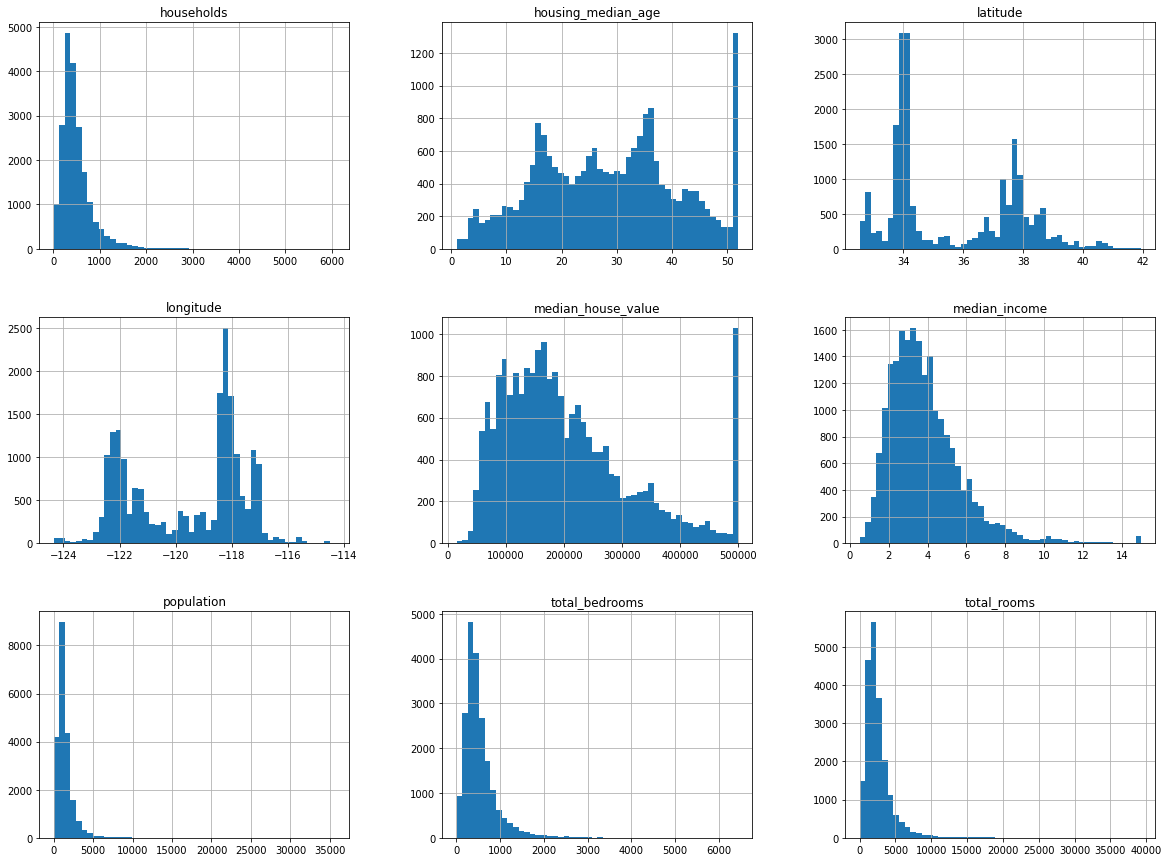

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20,15))
plt.show()

In [13]:
import numpy as np

In [14]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(housing,0.2)

In [16]:
housing['income_cat'] = np.ceil(housing["median_income"]/1.5)
housing['income_cat'].where(housing['income_cat']<5,5.0, inplace= True)

In [17]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [22]:
test_set['income_cat'] = np.ceil(test_set["median_income"]/1.5)
test_set['income_cat'].where(test_set['income_cat']<5,5.0, inplace= True)
test_set['income_cat'].value_counts()/len(test_set)

/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64

In [23]:
for set in (strat_train_set,strat_test_set):
    set.drop(['income_cat'],axis = 1, inplace = True)

In [24]:
len(strat_train_set)

16512

### 1. Visulizing Geographical data

In [25]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

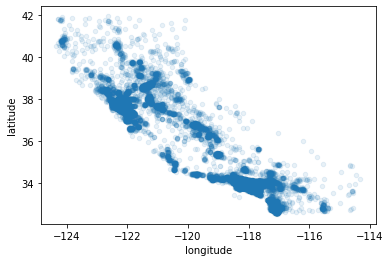

In [30]:
housing.plot(kind='scatter', x='longitude', y = 'latitude',alpha = 0.1)

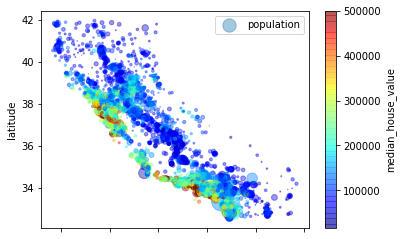

In [31]:
housing.plot(kind = 'scatter',x='longitude', y = 'latitude', alpha = 0.4, s= housing['population']/100, label = 'population',\
            c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)
plt.legend()

#### Looking for correlations

In [27]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [28]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

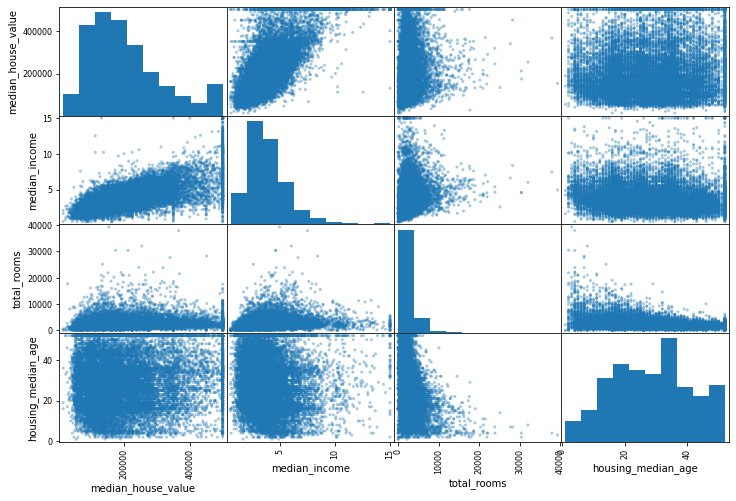

In [29]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8),alpha = 0.4)

### 1. Prepare the data fro ML algorithms 
#### Data cleaning

In [32]:
housing = strat_train_set.drop('median_house_value', axis =1)
housing_labels = strat_train_set['median_house_value'].copy()

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [34]:
housing_cat = housing['ocean_proximity']

In [35]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

In [37]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN


In [38]:
rooms_ix, bedroom_ix, population_ix, household_ix = 3,4,5,6

In [39]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedroom_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household, population_per_household]

In [40]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [41]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [42]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [49]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

num_transformers = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

In [50]:
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('one_hot_encoder',OneHotEncoder(sparse =False)),
])

cat_transformers = Pipeline([
    ('one_hot_encoder',OneHotEncoder(sparse =False)),
])

In [45]:
full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [47]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [52]:
from sklearn.compose import ColumnTransformer
full_transformers = ColumnTransformer(transformers=[
        ('num', num_transformers, num_attribs),
        ('cat', cat_transformers, cat_attribs)])

In [59]:
housing_prepared1 = full_transformers.fit_transform(housing)
housing_prepared1.shape

(16512, 16)

In [56]:
housing_prepared[housing_prepared1!=housing_prepared]

array([], dtype=float64)

In [60]:
print(16512*16)
housing_prepared[housing_prepared1==housing_prepared].shape

264192


(264192,)

### 2. Select and Train a Model

In [61]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [65]:
some_data =housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [66]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [73]:
list(some_labels)

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]

In [69]:
some_data_prepared = full_pipeline.transform(some_data)

In [71]:
lin_reg.predict(some_data_prepared)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

In [74]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [75]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [76]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [78]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
np.sqrt(tree_mse)

0.0

In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels, scoring = "neg_mean_squared_error",cv=10)

In [81]:
rmse_scores = np.sqrt(-scores)

In [82]:
print("mean : ", rmse_scores.mean(), ", std : ",rmse_scores.std())

mean :  70666.74616904806 , std :  2928.322738055112


In [83]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels, scoring = "neg_mean_squared_error",cv=10)

In [84]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [85]:
print("mean : ", lin_rmse_scores.mean(), ", std : ",lin_rmse_scores.std())

mean :  69052.46136345083 , std :  2731.674001798348


In [88]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [89]:
rf_predictions = rf_reg.predict(housing_prepared)
rf_rmse = np.sqrt(mean_squared_error(housing_labels, rf_predictions))
rf_rmse

18474.317258890904

In [90]:
rf_scores = cross_val_score(rf_reg,housing_prepared,housing_labels, scoring = "neg_mean_squared_error",cv=10)

In [91]:
rf_rmse_scores = np.sqrt(-rf_scores)

In [92]:
print("mean : ", rf_rmse_scores.mean(), ", std : ",rf_rmse_scores.std())

mean :  50208.91505667546 , std :  1963.8708559221748


#### Fine-tune a model

In [93]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[3,10,30,45],'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'n_estimators':[3,10,30,45],'max_features':[2,4,6,8]}]

In [95]:
grid_search =GridSearchCV(rf_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 45]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 45]}],
             scoring='neg_mean_squared_error')

In [96]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=45)

In [98]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

64816.29003621052 {'max_features': 2, 'n_estimators': 3}
55620.10592617045 {'max_features': 2, 'n_estimators': 10}
53031.695924098836 {'max_features': 2, 'n_estimators': 30}
52446.75300517543 {'max_features': 2, 'n_estimators': 45}
60140.995898185836 {'max_features': 4, 'n_estimators': 3}
52683.261701581716 {'max_features': 4, 'n_estimators': 10}
50410.66087401907 {'max_features': 4, 'n_estimators': 30}
50188.09461540373 {'max_features': 4, 'n_estimators': 45}
58278.61875422706 {'max_features': 6, 'n_estimators': 3}
51844.805295346974 {'max_features': 6, 'n_estimators': 10}
50161.72211664186 {'max_features': 6, 'n_estimators': 30}
49831.15126112514 {'max_features': 6, 'n_estimators': 45}
59013.480963940005 {'max_features': 8, 'n_estimators': 3}
52108.57263411041 {'max_features': 8, 'n_estimators': 10}
50075.43950652747 {'max_features': 8, 'n_estimators': 30}
49641.52558604239 {'max_features': 8, 'n_estimators': 45}
62766.60315667721 {'bootstrap': False, 'max_features': 2, 'n_estimators

#### Evaluate the final model on the test set

In [99]:
final_model = grid_search.best_estimator_

In [100]:
X_test = strat_test_set.drop('median_house_value',axis = 1)
y_test = strat_test_set['median_house_value'].copy()

In [101]:
X_test_prepared = full_pipeline.transform(X_test)

In [102]:
final_predictions = final_model.predict(X_test_prepared)

In [103]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47086.37904338189